# Practical Exercise with MNIST Example

In [1]:
import torch
import torch.nn

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from model import ImageClassifier
from utils import load_mnist

In [3]:
model_fn = "./model.pth"

In [4]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [5]:
def load(fn, device):
    d = torch.load(fn, map_location=device)
    
    return d['model']

In [6]:
def plot(x, y_hat):
    for i in range(x.size(0)):
        img = (np.array(x[i].detach().cpu(), dtype='float')).reshape(28,28)

        plt.imshow(img, cmap='gray')
        plt.show()
        print("Predict:", float(torch.argmax(y_hat[i], dim=-1)))

In [7]:
def test(model, x, y, to_be_shown=True):
    model.eval()
    
    with torch.no_grad():
        y_hat = model(x)

        correct_cnt = (y.squeeze() == torch.argmax(y_hat, dim=-1)).sum()
        total_cnt = float(x.size(0))
        
        accuracy = correct_cnt / total_cnt
        print("Accuracy: %.4f" % accuracy)
        
        if to_be_shown:
            plot(x, y_hat)

C:\Anaconda3\envs\nbcc_on_campus\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Accuracy: 0.9500


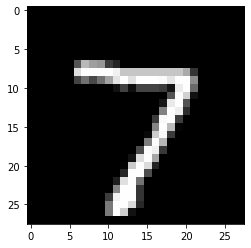

Predict: 7.0


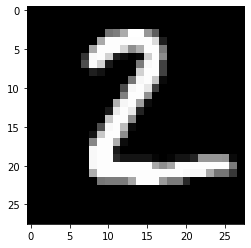

Predict: 2.0


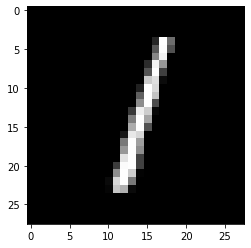

Predict: 1.0


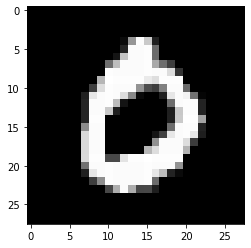

Predict: 0.0


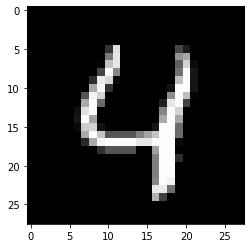

Predict: 4.0


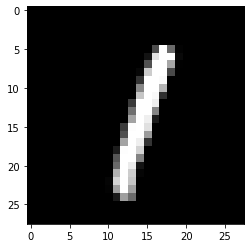

Predict: 1.0


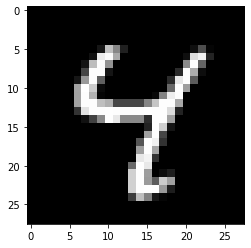

Predict: 4.0


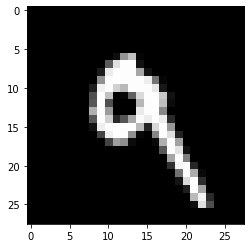

Predict: 9.0


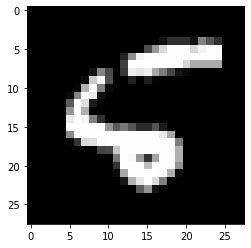

Predict: 5.0


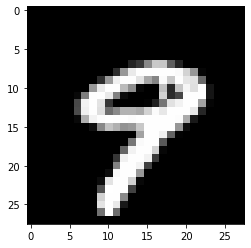

Predict: 9.0


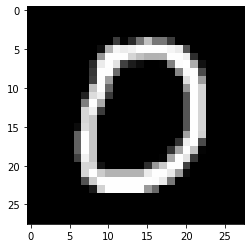

Predict: 0.0


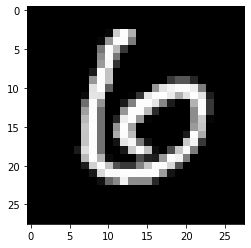

Predict: 6.0


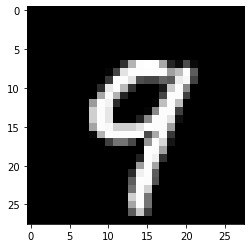

Predict: 9.0


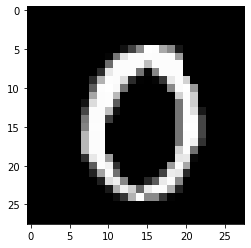

Predict: 0.0


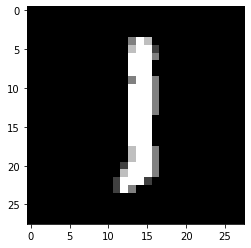

Predict: 1.0


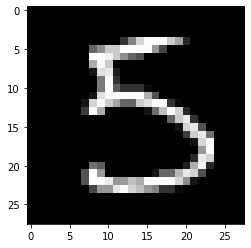

Predict: 5.0


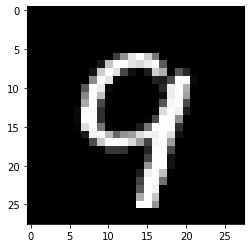

Predict: 9.0


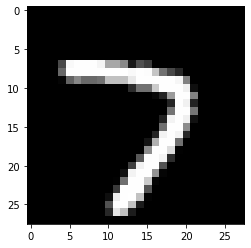

Predict: 7.0


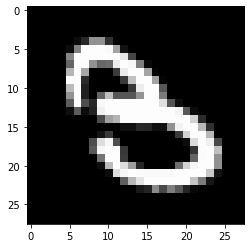

Predict: 8.0


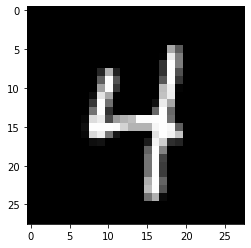

Predict: 4.0


In [8]:
# Load MNIST test set.
x, y = load_mnist(is_train=False)
# Reshape tensor to chunk of 1-d vectors.
x = x.view(x.size(0), -1)

x, y = x.to(device), y.to(device)

model = ImageClassifier(28**2, 10).to(device)
model.load_state_dict(load(model_fn, device))

test(model, x[:20], y[:20], to_be_shown=True)